<a href="https://colab.research.google.com/github/ibenatar-96/statistical-rethinking-numpyro/blob/main/chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Chapter 3 in Statistical Rethinking.

In [1]:
!pip install -q numpyro arviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 2.4 MB/s eta 0:00:00


In [2]:
import os

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

import jax.numpy as jnp
from jax import random, vmap

import numpyro
import numpyro.distributions as dist

In [4]:
# Code 3.2

# Creating the posterior same as chapter 2
p_grid = jnp.linspace(start=0, stop=1, num=1000)

prob_p = jnp.repeat(1, 1000)

prob_data = jnp.exp(dist.Binomial(total_count=9, probs=p_grid).log_prob(6))

posterior = prob_data * prob_p

posterior = posterior / jnp.sum(posterior)

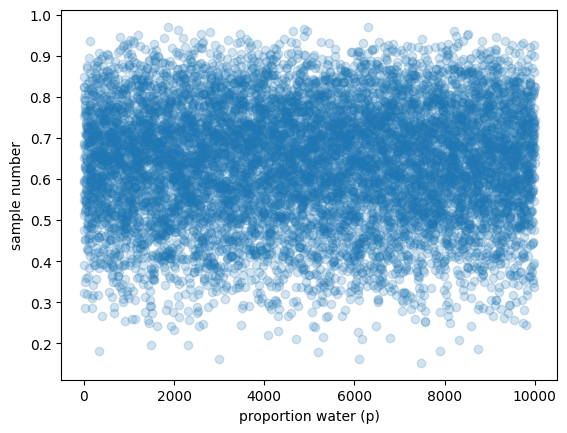

In [16]:
# Code 3.3

# Now we want to sample from the posterior, our posterior is a "bucket" of values, with each value appearing PROPORTIONATE to its posterior probability.
# For example, if the probability for 'p' to be 0.5 is 0.1 (meaning 'p' = 0.5 with probability 0.1), and our "bucket" contains 10,000 values, then 0.5 will account of 10% of the values in the bucket --
# Meaning that the value 0.5 will appear 1,000 times in our bucket.

samples = p_grid[dist.Categorical(probs=posterior).sample(random.PRNGKey(0), (10000,))]

# This is the same as writing:
# for i in range(10000):
#     sample_index = dist.Categorical(probs=posterior).sample(random_seed)
#     sample.append(p_grid[sample_index])

plt.scatter(range(len(samples)), samples, alpha=0.2)
plt.xlabel('proportion water (p)')
plt.ylabel('sample number')
plt.show()

We can see that most of our samples are near 0.6, 0.7.. meaning our "mass" of values in the bucket is 0.6, 0.7

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


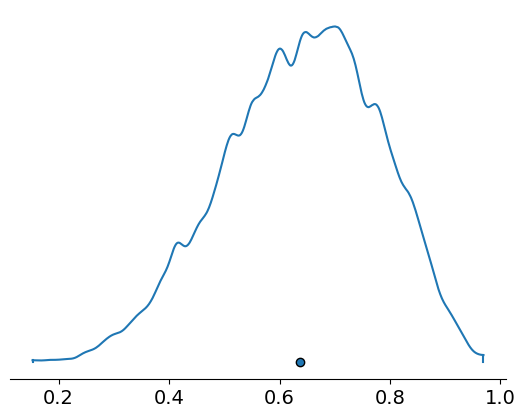

In [17]:
az.plot_density({"": samples}, hdi_prob=1)
plt.show()

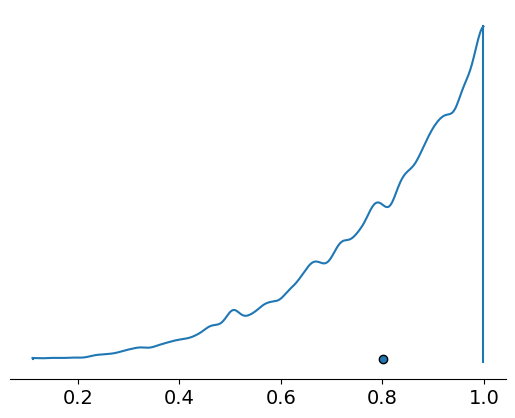

In [22]:
# Code 3.11

# Here we are creating a posterior that is skewed, our data is that we saw 3 W in 3 tosses.
p_grid = jnp.linspace(start=0, stop=1, num=1000)
prior = jnp.repeat(1, 1000)
likelihood = jnp.exp(dist.Binomial(total_count=3, probs=p_grid).log_prob(3))
posterior = likelihood * prior
posterior = posterior / jnp.sum(posterior)
samples = p_grid[dist.Categorical(probs=posterior).sample(random.PRNGKey(0), (10000,))]

az.plot_density({"": samples}, hdi_prob=1)
plt.show()

In [19]:
# Code 3.12

jnp.percentile(samples, q=jnp.array([25, 75])) # Percentile Interval

Array([0.7077077, 0.9319319], dtype=float32)

In [20]:
# Code 3.13

numpyro.diagnostics.hpdi(samples, prob=0.5) # Highest Posterior Density Interval

array([0.8418418, 0.998999 ], dtype=float32)

In [21]:
# Code 3.14

p_grid[jnp.argmax(posterior)] # This is the parameter value with the highest probability.

Array(1., dtype=float32)